<a href="https://colab.research.google.com/github/BitUpTeam/BitUp/blob/Amasya/Copy_of_Copy_of_BitUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Приведение dataset'а в необходимый для нейронки вид

In [ ]:
df = pd.read_csv("https://github.com/BitUpTeam/BitUp/blob/main/BTC-USD-DAY-17.09.2014-06.03.2023.csv?raw=true", index_col = 'Date', parse_dates = True)
df    

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913


In [ ]:
# del closedf['Date']
scaler=StandardScaler()
df=scaler.fit_transform(np.array(df).reshape(-1,6))
print(df.shape)

(3093, 6)


In [ ]:
training_size=int(len(df)*0.70)
val_size=int((len(df)-training_size)*0.5)
test_size=int((len(df)-training_size)*0.5)
train_data,val_data,test_data=df[0:training_size,:],df[training_size:training_size+val_size,:],df[training_size+val_size:len(df),:]
print("train_data: ", train_data.shape)
print("val_data: ", val_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2165, 6)
val_data:  (464, 6)
test_data:  (464, 6)


**ДОБАВЛЕНИЕ ПРЕДСКАЗАНИЙ НА НЕСКОЛЬКО ДНЕЙ ТУТ**

остальное все то же самое

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1,label_width=0):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-label_width-1):
        a = dataset[i:(i+time_step), :]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append([dataset[i + time_step+label_width-1, 3]])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
label_width = 5
X_train, y_train = create_dataset(train_data, time_step=time_step, label_width=label_width)
X_val, y_val = create_dataset(val_data, time_step=time_step, label_width=label_width)
X_test, y_test = create_dataset(test_data,  time_step=time_step, label_width=label_width)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2144, 15, 6)
y_train:  (2144, 1)
X_val:  (443, 15, 6)
y_val:  (443, 1)
X_test:  (443, 15, 6)
y_test (443, 1)


**ДОБАВЛЕНИЕ ПРЕДСКАЗАНИЙ НА НЕСКОЛЬКО ДНЕЙ ТУТ**

остальное все то же самое

# Создание и обучение LSTM

In [ ]:
model=Sequential()

model.add(LSTM(16,return_sequences = False,activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model1",
                                            save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=25,
                                                    mode='min')

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=256,verbose=1,
                    callbacks=[early_stopping, checkpoint])#2

Epoch 1/100
9/9 [==============================] - 3s 46ms/step - loss: 0.1571 - val_loss: 2.3765
Epoch 2/100
6/9 [===================>..........] - ETA: 0s - loss: 0.0387

9/9 [==============================] - 2s 269ms/step - loss: 0.0301 - val_loss: 1.8635
Epoch 3/100
6/9 [===================>..........] - ETA: 0s - loss: 0.0052

9/9 [==============================] - 3s 346ms/step - loss: 0.0068 - val_loss: 1.2066
Epoch 4/100
5/9 [===============>..............] - ETA: 0s - loss: 0.0099

9/9 [==============================] - 2s 276ms/step - loss: 0.0081 - val_loss: 0.9790
Epoch 5/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0030 - val_loss: 8.8823
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0033 - val_loss: 43.3214
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0027 - val_loss: 153.8076
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0025 - val_loss: 242.3852
Epoch 9/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0024 - val_loss: 274.6851
Epoch 10/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0023 - val_loss: 225.0684
Epoch 11/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0023 - val_loss: 152.3190
Epoch 12/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 52.3450
Epoch 13/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 16.9230
Epoch 14/100
9

9/9 [==============================] - 3s 358ms/step - loss: 0.0021 - val_loss: 0.3725
Epoch 16/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0021 - val_loss: 0.4935
Epoch 17/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.5995
Epoch 18/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 0.5417
Epoch 19/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.6564
Epoch 20/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0019 - val_loss: 0.6796
Epoch 21/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0019 - val_loss: 0.7289
Epoch 22/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.7098
Epoch 23/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.7446
Epoch 24/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0019 - val_loss: 0.7228
Epoch 25/100
9/9 [====

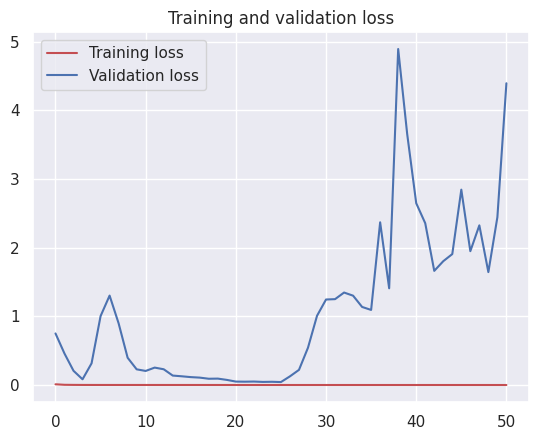

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()
#Потери при обучение в сравнении с потерями при проверке

# Оценка модели

In [ ]:
new_model2 = tf.keras.models.load_model('best_model')

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=new_model2.predict(X_train)
val_predict=new_model2.predict(X_val)
test_predict=new_model2.predict(X_test)
train_predict.shape, val_predict.shape, test_predict.shape

14/14 [==============================] - 0s 5ms/step


((2144, 1), (443, 1), (443, 1))

In [ ]:
##########################
df1 = pd.read_csv("https://github.com/BitUpTeam/BitUp/blob/main/BTC-USD-DAY-17.09.2014-06.03.2023.csv?raw=true", index_col = 'Date', parse_dates = True)
scaler1=StandardScaler()
scaler1.fit_transform(np.array(df1['Close']).reshape(-1,1))

array([[-0.78376947],
       [-0.7858168 ],
       [-0.78766184],
       ...,
       [ 0.57904057],
       [ 0.58415447],
       [ 0.58437547]])

In [ ]:
# Transform back to original form

train_predict = scaler1.inverse_transform(train_predict)
val_predict=scaler1.inverse_transform(val_predict)
test_predict = scaler1.inverse_transform(test_predict)
original_ytrain = scaler1.inverse_transform(y_train.reshape(-1,1))
original_yval=scaler1.inverse_transform(y_val.reshape(-1,1)) 
original_ytest = scaler1.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  685.8706541700808
Train data MSE:  470418.5542516946
Train data MAE:  454.26309256506005
-------------------------------------------------------------------------------------
Test data RMSE:  1355.5268198723327
Test data MSE:  1837452.9593931993
Test data MAE:  977.9859314054129


In [ ]:
print("Validation data RMSE: ", math.sqrt(mean_squared_error(original_yval,val_predict)))
print("Validation data MSE: ", mean_squared_error(original_yval,val_predict))
print("Validation data MAE: ", mean_absolute_error(original_yval,val_predict))

Validation data RMSE:  3547.816182418293
Validation data MSE:  12586999.66422911
Validation data MAE:  2121.9667018228756


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#0.98
print("Train data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_ytrain,train_predict)))
print("Test data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_ytest,test_predict)))
print("Validation data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_yval,val_predict)))

Train data MAPE:  0.47496658062610464
Test data MAPE:  0.19150133790139726
Validation data MAPE:  0.23715732268285425


In [ ]:
#0.93 best_model
print("Train data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_ytrain,train_predict)))
print("Test data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_ytest,test_predict)))
print("Validation data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_yval,val_predict)))

Train data MAPE:  0.3853721031276584
Test data MAPE:  0.5348732745154333
Validation data MAPE:  0.6017954078179001


In [ ]:
#0.93 best_model
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain[:,0], train_predict[:,0],force_finite=False))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest[:,0], test_predict[:,0],force_finite=False))
print("Validation data explained variance regression score:", 
      explained_variance_score(original_yval[:,0], val_predict[:,0],force_finite=False))

Train data explained variance regression score: 0.9680440144245052
Test data explained variance regression score: 0.867879935791422
Validation data explained variance regression score: 0.5628444712565814


In [ ]:
#0.93 best_model1
print("Train data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_ytrain,train_predict)))
print("Test data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_ytest,test_predict)))
print("Validation data MAPE: ", math.sqrt(mean_absolute_percentage_error(original_yval,val_predict)))

Train data MAPE:  0.37808235767578824
Test data MAPE:  0.3823687528938511
Validation data MAPE:  0.4365626328091498


In [ ]:
#0.93 best_model1
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain[:,0], train_predict[:,0],force_finite=False))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest[:,0], test_predict[:,0],force_finite=False))
print("Validation data explained variance regression score:", 
      explained_variance_score(original_yval[:,0], val_predict[:,0],force_finite=False))

Train data explained variance regression score: 0.9679902324967595
Test data explained variance regression score: 0.9354437703446719
Validation data explained variance regression score: 0.7461739674612964


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain[:,0], train_predict[:,0],force_finite=False))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest[:,0], test_predict[:,0],force_finite=False))

Train data explained variance regression score: 0.9728662394861379
Test data explained variance regression score: 0.9831845972101206


In [ ]:
print("Validation data explained variance regression score:", 
      explained_variance_score(original_yval[:,0], val_predict[:,0],force_finite=False))

Validation data explained variance regression score: 0.9579888605207524


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain[:,0], train_predict[:,0]))
print("Test data MGD: ", mean_gamma_deviance(original_ytest[:,0], test_predict[:,0]))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain[:,0], train_predict[:,0]))
print("Test data MPD: ", mean_poisson_deviance(original_ytest[:,0], test_predict[:,0]))

Train data MGD:  0.44960065957343687
Test data MGD:  0.002811229220176219
----------------------------------------------------------------------
Train data MPD:  112.93674113576033
Test data MPD:  66.86782145764622


In [ ]:
print("Validation data MGD: ", mean_gamma_deviance(original_yval[:,0], val_predict[:,0]))
print("Validation data MPD: ", mean_poisson_deviance(original_yval[:,0], val_predict[:,0]))

ValueError: ignored

# **Сравнение первоначальной цены закрытия акций и прогнозируемой цены закрытия**

In [ ]:
closedf=df[:,3].reshape([-1,1])

In [ ]:
look_back=time_step

# shift train predictions for plotting
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:,] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift validation predictions for plotting
valPredictPlot = np.empty_like(closedf)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(train_predict)+(look_back*2)+1:len(train_predict)+(look_back*2)+len(val_predict)+1, :] = val_predict
print("Validation predicted data: ", valPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*3)+len(val_predict)+2:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Validation predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': df1.index,
                       'original_close': df1['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'val_predicted_close': valPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['val_predicted_close'],plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3093, 1)
Validation predicted data:  (3093, 1)
Test predicted data:  (3093, 1)


# Draft

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)#1

Epoch 1/100
68/68 [==============================] - 3s 13ms/step - loss: 0.0028 - val_loss: 0.2552
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 6.1171e-04 - val_loss: 20.2711
Epoch 3/100
68/68 [==============================] - 1s 8ms/step - loss: 2.1011e-04 - val_loss: 4.5225
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 1.6623e-04 - val_loss: 1.4652
Epoch 5/100
68/68 [==============================] - 1s 10ms/step - loss: 1.4327e-04 - val_loss: 0.4317
Epoch 6/100
68/68 [==============================] - 1s 14ms/step - loss: 1.2691e-04 - val_loss: 0.2406
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 1.1584e-04 - val_loss: 0.1246
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 1.0230e-04 - val_loss: 0.0766
Epoch 9/100
68/68 [==============================] - 1s 9ms/step - loss: 9.0280e-05 - val_loss: 0.0598
Epoch 10/100
68/68 [==============================] - 1s 10ms/step - lo

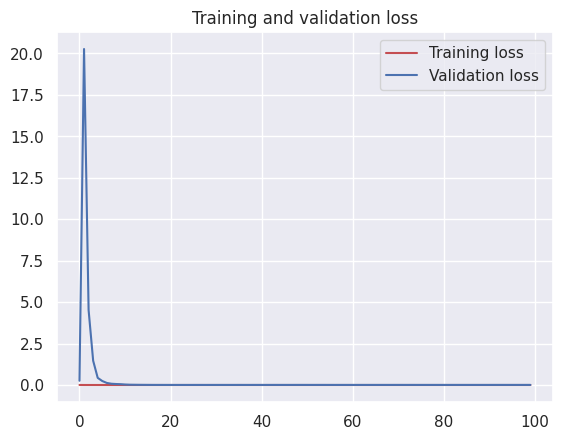

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()
#Потери при обучение в сравнении с потерями при проверке